# CNN - Project

## Domain:  
Botanical research 
## Context: 
University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have have invested on curating sample
images. They require an automation which can create a classifier capable of determining a plant's species from a
photo
## Data Description:
The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/
plant-seedlings-classification/data
## Project Objective: 
University’s management require an automation which can create a classifier capable of
determining a plant's species from a photo

# Botanical Research

## 1. Import the data. Analyse the dimensions of the data. Visualise the data.

**Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/AIML/Train dataset - CV project 1"

/content/drive/MyDrive/AIML/Train dataset - CV project 1


In [ ]:
import cv2
import os
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import svm, metrics
from natsort import natsorted
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV

In [ ]:
paths = glob.glob("train/*")
label_names = [os.path.split(x)[-1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format(label_names))

Total labels: 12
Labels: ['Common wheat', 'Maize', 'Fat Hen', 'Shepherds Purse', 'Loose Silky-bent', 'Small-flowered Cranesbill', 'Scentless Mayweed', 'Sugar beet', 'Common Chickweed', 'Cleavers', 'Black-grass', 'Charlock']


**Exploring Data**

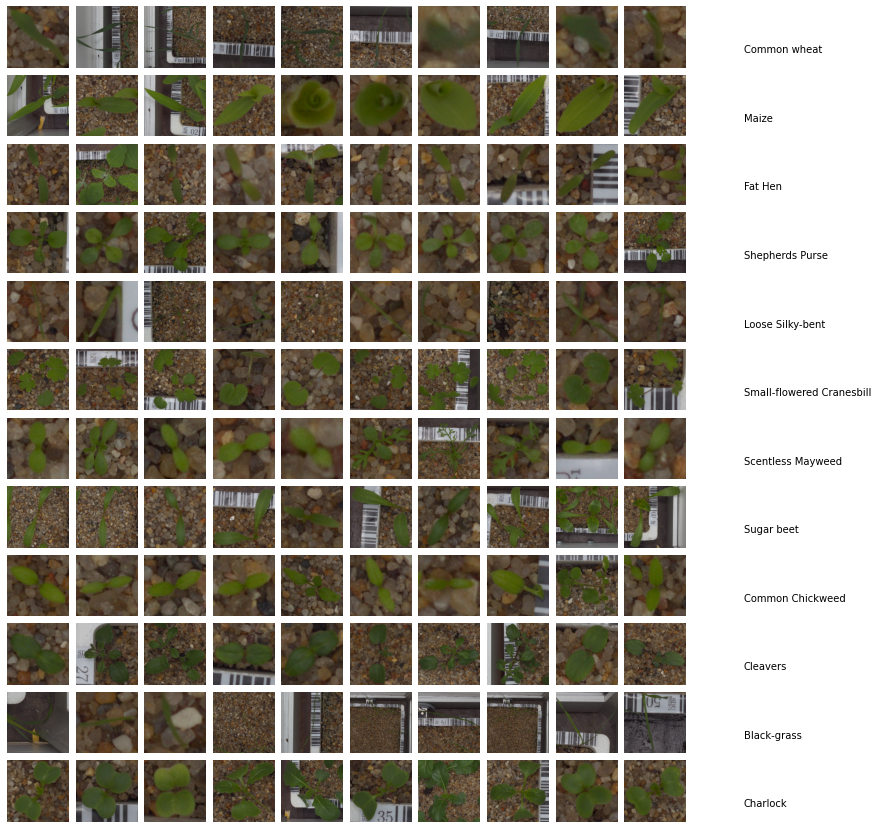

In [ ]:
fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    paths = glob.glob(os.path.join("train", label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)

    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

In [ ]:
img.shape

(150, 150, 3)

**Reading Images**

In this step, we simply store the path to our image dataset into a variable and then we create a function to load folders containing images into arrays so that computers can deal with it.

In [ ]:
#save the path into variable to use it easily next times.
TRAIN_FOLDER= "train"

In [ ]:
from glob import glob
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAIN_FOLDER):
    class_folder_path = os.path.join(TRAIN_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missing value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)

In [ ]:
len(images)

4767

**Resizing images**
Some images captured by a camera and fed to our AI algorithm vary in size, therefore, we should establish a base size for all images fed into our AI algorithms by resizing them.

In [ ]:
# resize image
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

#save resized images into images.
images = [resize_images(img) for img in images]

In [ ]:
images[0].shape

(256, 256, 3)

In [ ]:
#see number of images in each label
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)

images shape:  (4767, 256, 256, 3)
classes shape:  (4767,)


**Viewing the distribution of number of images in each class**

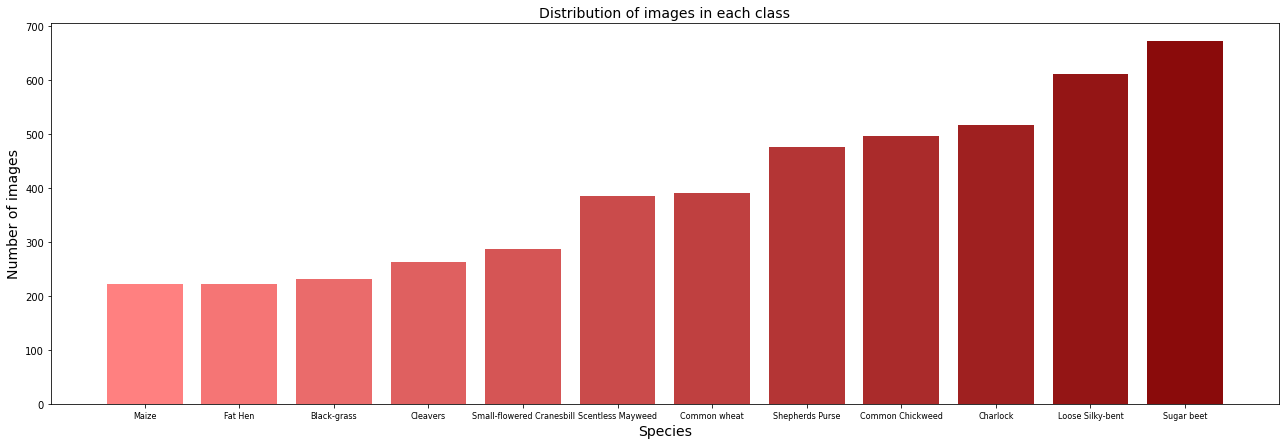

In [ ]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

values.sort()

code=np.arange(0,13,1)
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values, color=color_map(data_normalizer(code)))
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
plt.xlabel("Species", fontsize = 14)
plt.ylabel("Number of images", fontsize = 14)
plt.title("Distribution of images in each class", fontsize=14)
plt.show()

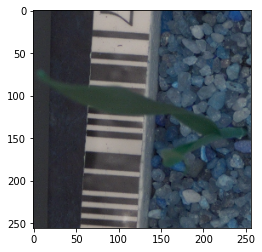

In [ ]:
plt.imshow(images[50])

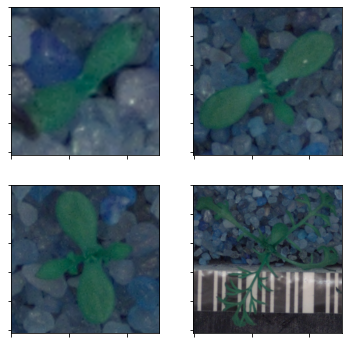

In [ ]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Scentless Mayweed")

In [ ]:
#!ls "train/Scentless Mayweed" 1300c3cd9.png

img = cv2.imread("train/Scentless Mayweed/1300c3cd9.png")

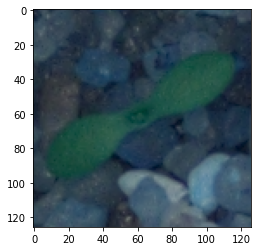

In [ ]:
plt.imshow(img)

### **Image Classification**

Structure of an Image Classification Task

---


1.   Image Preprocessing - The aim of this process is to improve the image data
(features) by suppressing unwanted distortions and enhancement of some important image features so that our Computer Vision models can benefit from this improved data to work on.
2.   Detection of an object - Detection refers to the localization of an object which means the segmentation of the image and identifying the position of the object of interest.
3. Feature extraction and Training- This is a crucial step wherein statistical or deep learning methods are used to identify the most interesting patterns of the image, features that might be unique to a particular class and that will, later on, help the model to differentiate between different classes. This process where the model learns the features from the dataset is called model training.
4. Classification of the object - This step categorizes detected objects into predefined classes by using a suitable classification technique that compares the image patterns with the target patterns.

### *Image Preprocessing*

Pre-processing is a common name for operations with images at the lowest level of abstraction — both input and output are intensity images.

Need for Image-Preprocessing:

---


Computers are able to perform computations on numbers and is unable to interpret images in the way that we do. We have to somehow convert the images to numbers for the computer to understand.
The aim of pre-processing is an improvement of the image data that suppresses unwilling distortions or enhances some image features important for further processing.

**Converting images from RGB to HSV and applying mophological transformations**

In [ ]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

**Applying Segmentation**

In [ ]:
def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

**Applying Sharpening**

In [ ]:
def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [ ]:
# Combining all functions

def preprocess(img):
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

for indx, image in enumerate(images):
  try:
    images[indx] = preprocess(image)
      
  except:
    print(indx)
    continue

**Viewing the pre-processed images**

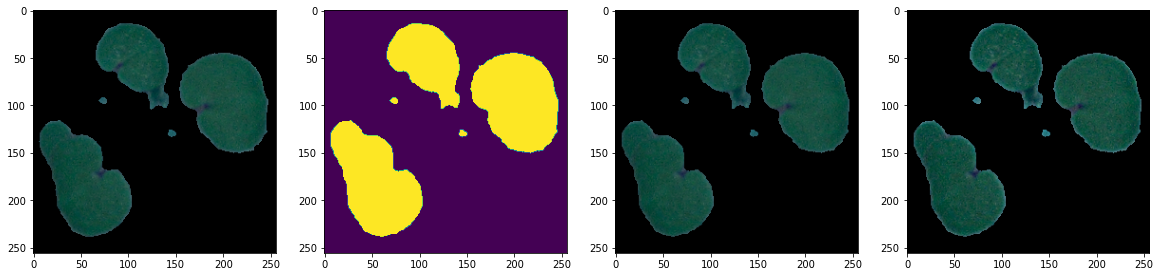

In [ ]:
images = np.array(images)
classes = np.array(classes)
image = images[classes == "Small-flowered Cranesbill"][40]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

In [ ]:
model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Loss','Predicted Class'])

In [ ]:
number_of_columns = images[1].shape[0] * images[1].shape[1]
print(number_of_columns)

65536


**Reading the image to predict**

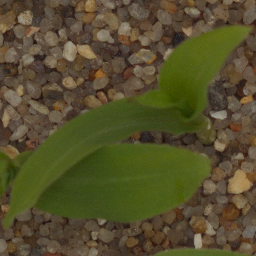

The shape of image to be predicted is:'(578, 578, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 256, 256, 3)'


In [ ]:
from google.colab.patches import cv2_imshow

img_pred = cv2.imread('/content/drive/MyDrive/AIML/Train dataset - CV project 1/Predict.png')
img_pred_resize = cv2.resize(img_pred,(256,256), interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_pred_resize)
img_predict = np.expand_dims(img_pred_resize, axis=0)
print(f"The shape of image to be predicted is:'{img_pred.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{img_predict.shape}'")

**Encoding the Target Variable**

In [ ]:
enc = LabelEncoder()
y = enc.fit_transform(classes)

num_classes = len(np.unique(y))
num_classes


12

**Splitting data into training and testing set**

training set : 70%

testing set: 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

**Creating validation set**

splitting test and validation sets each with 50% of data

In [ ]:
random_seed = 2
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [ ]:
print(f"#### Shapes of Train, Test and Validation sets are: {X_train.shape},{X_test.shape},{X_val.shape}")

#### Shapes of Train, Test and Validation sets are: (3336, 256, 256, 3),(715, 256, 256, 3),(716, 256, 256, 3)


In [ ]:
print(f"#### Shapes of Train, Test and Validation sets of Target are: {y_train.shape},{y_test.shape},{y_val.shape}")

#### Shapes of Train, Test and Validation sets of Target are: (3336,),(715,),(716,)


In [ ]:
# import tensorflow as tf
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
# y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

## 2. Design, train tune and test the best AIML image classifier model using:

### *Classification using Supervised Learning Techniques*

1. **Support Vector Machines**

The dataset have over 65536 features for each image and only 3336 images total in train dataset. To use an SVM, our model of choice, the number of features needs to be reduced.

PCA is a way of linearly transforming the data such that most of the information in the data is contained within a smaller number of features called components.

In [ ]:
def flatten(X):
  Xr, Xg, Xb = [],[],[]
  for samples in X:
    r, g, b = cv2.split(samples)
    Xr.append(r.flatten())
    Xg.append(g.flatten())
    Xb.append(b.flatten())
  Xr = np.array(Xr)
  Xg = np.array(Xg)
  Xb = np.array(Xb)
  return (Xr, Xg, Xb)

In [ ]:
X_train_r, X_train_g, X_train_b = flatten(X_train)
X_test_r, X_test_g, X_test_b = flatten(X_test)
X_val_r, X_val_g, X_val_b = flatten(X_val)

In [ ]:
X_train_r.shape, X_train_g.shape, X_train_b.shape,
X_test_r.shape, X_test_g.shape, X_test_b.shape,
X_val_r.shape, X_val_g.shape, X_val_b.shape

((716, 65536), (716, 65536), (716, 65536))

In [ ]:
n_components = 500
X_train_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_r)
X_train_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_g)
X_train_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_b)

X_test_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_r)
X_test_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_g)
X_test_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_b)

X_val_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_r)
X_val_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_g)
X_val_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_b)

In [ ]:
Xr_train_pca = X_train_pca_r.transform(X_train_r)
Xg_train_pca = X_train_pca_g.transform(X_train_g)
Xb_train_pca = X_train_pca_b.transform(X_train_b)

Xr_test_pca = X_test_pca_r.transform(X_test_r)
Xg_test_pca = X_test_pca_g.transform(X_test_g)
Xb_test_pca = X_test_pca_b.transform(X_test_b)

Xr_val_pca = X_val_pca_r.transform(X_val_r)
Xg_val_pca = X_val_pca_g.transform(X_val_g)
Xb_val_pca = X_val_pca_b.transform(X_val_b)

In [ ]:
X_train_pca_r.explained_variance_ratio_.sum(), X_train_pca_g.explained_variance_ratio_.sum(), X_train_pca_b.explained_variance_ratio_.sum(),
X_test_pca_r.explained_variance_ratio_.sum(), X_test_pca_g.explained_variance_ratio_.sum(), X_test_pca_b.explained_variance_ratio_.sum(),
X_val_pca_r.explained_variance_ratio_.sum(), X_val_pca_g.explained_variance_ratio_.sum(), X_val_pca_b.explained_variance_ratio_.sum()

(0.958371287808277, 0.9787063669007443, 0.9712060799281754)

In [ ]:
X_train_pca = np.concatenate([Xr_train_pca,Xg_train_pca,Xb_train_pca], axis=1)
X_test_pca = np.concatenate([Xr_test_pca,Xg_test_pca,Xb_test_pca], axis=1)
X_val_pca = np.concatenate([Xr_val_pca,Xg_val_pca,Xb_val_pca], axis=1)

In [ ]:
X_train_pca.shape, y_train.shape,
X_test_pca.shape, y_test.shape,
X_val_pca.shape, y_val.shape

((716, 1500), (716,))

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = SVC()
clf = GridSearchCV(svc, param_grid, verbose=10, n_jobs=-1)
clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=10)

In [ ]:
X_train.shape[0]

3336

In [ ]:
y_train.shape[0]

3336

In [ ]:
svm_score = clf.score(X_val_pca, y_val)

In [ ]:
y_pred = clf.predict(X_test_pca)
svm_accuracy = metrics.accuracy_score(y_test, y_pred)

**Prediction using SVM**

In [ ]:
pred_img = np.squeeze(img_predict, axis=0)
X_pred_r, X_pred_g, X_pred_b = cv2.split(pred_img)

In [ ]:
X_pred_pca_r = X_train_pca_r.transform(np.expand_dims(X_pred_r.flatten(), axis=0))
X_pred_pca_g = X_train_pca_g.transform(np.expand_dims(X_pred_g.flatten(), axis=0))
X_pred_pca_b = X_train_pca_b.transform(np.expand_dims(X_pred_b.flatten(), axis=0))

X_pred_pca = np.concatenate([X_pred_pca_r,X_pred_pca_g,X_pred_pca_b], axis=1)

In [ ]:
pred_svm = clf.predict(X_pred_pca)[0]

print(f"The predicted label is:'{pred_svm}'")

The predicted label is:'7'


In [ ]:
model_performance = model_performance.append({'Model':'SVM',
                                              'Accuracy': svm_accuracy,
                                              'Loss': 'NA',
                                              'Predicted Class': pred_svm                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,SVM,0.311888,NA,7


2. **Random Forest**

In [ ]:
param_grid=[
            {'n_estimators':[100,200],
             'min_samples_leaf':[2,3]}
           ]
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid, verbose=10, n_jobs=-1)
clf.fit(X_train_pca,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'min_samples_leaf': [2, 3],
                          'n_estimators': [100, 200]}],
             verbose=10)

In [ ]:
rf_score = clf.score(X_val_pca, y_val)
y_pred = clf.predict(X_test_pca)
rf_accuracy = metrics.accuracy_score(y_test, y_pred)
pred_rf = clf.predict(X_pred_pca)[0]
print(f"The predicted label is:'{pred_rf}'")

The predicted label is:'1'


In [ ]:
model_performance = model_performance.append({'Model':'RF',
                                              'Accuracy': rf_accuracy,
                                              'Loss': 'NA',
                                              'Predicted Class': pred_rf                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,SVM,0.311888,NA,7
1,RF,0.408392,NA,1


 **3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = [
              {'max_leaf_nodes': list(range(2, 100)), 
               'min_samples_split': [2, 3, 4]}
              ]
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, param_grid, verbose=10, n_jobs=-1)
clf.fit(X_train_pca,y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29, 30,
                                             31, ...],
                          'min_samples_split': [2, 3, 4]}],
             verbose=10)

In [ ]:
dt_score = clf.score(X_val_pca, y_val)
y_pred = clf.predict(X_test_pca)
dt_accuracy = metrics.accuracy_score(y_test, y_pred)
pred_dt = clf.predict(X_pred_pca)[0]
print(f"The predicted label is:'{pred_dt}'")

The predicted label is:'1'


In [ ]:
model_performance = model_performance.append({'Model':'DT',
                                              'Accuracy': dt_accuracy,
                                              'Loss': 'NA',
                                              'Predicted Class': pred_dt                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,SVM,0.311888,NA,7
1,RF,0.408392,NA,1
2,DT,0.397203,NA,1


### *Classification using Artificial Neural Network (ANN)*

In [ ]:
import itertools

import tensorflow
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, InputLayer, Flatten
from tensorflow.python.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPool2D, GlobalMaxPool2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y2 = enc.fit_transform(classes)

In [ ]:
y2[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y2, test_size=0.3, random_state=50)

In [ ]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [ ]:
X_train.shape,y_train.shape

((3336, 256, 256, 3), (3336, 12))

In [ ]:
X_val.shape,y_val.shape

((716, 256, 256, 3), (716, 12))

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

2

In [ ]:
def ann_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  # batch_size = None

  model = Sequential()

  model.add(InputLayer(input_shape=(height, width, num_channels)))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(num_classes, activation = "softmax"))
  opt = tensorflow.keras.optimizers.Adam(lr=0.000001)
  model.compile(optimizer = opt, loss = loss, metrics = metrics)
  model.build(input_shape=(None,height, width, num_channels))
  model.summary()
  return model

In [ ]:
ann = ann_model(256,256,3,12)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 256, 256, 3)      0         
 er)                                                             
                                                                 
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 batch_normalization (BatchN  (None, 196608)           786432    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              201327616 
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
batch_size=0
history = ann.fit(X_train, 
                  y_train, 
                  epochs = 50, 
                  validation_data = (X_val,y_val),
                  batch_size=batch_size)

Epoch 1/50
105/105 [==============================] - 7s 55ms/step - loss: 2.6557 - accuracy: 0.1871 - val_loss: 2.1891 - val_accuracy: 0.2961
Epoch 2/50
105/105 [==============================] - 5s 51ms/step - loss: 2.0760 - accuracy: 0.3195 - val_loss: 1.7831 - val_accuracy: 0.4218
Epoch 3/50
105/105 [==============================] - 5s 51ms/step - loss: 1.8115 - accuracy: 0.3957 - val_loss: 1.6260 - val_accuracy: 0.4553
Epoch 4/50
105/105 [==============================] - 5s 52ms/step - loss: 1.6251 - accuracy: 0.4454 - val_loss: 1.5420 - val_accuracy: 0.4818
Epoch 5/50
105/105 [==============================] - 5s 51ms/step - loss: 1.4934 - accuracy: 0.4802 - val_loss: 1.4597 - val_accuracy: 0.5154
Epoch 6/50
105/105 [==============================] - 5s 51ms/step - loss: 1.4318 - accuracy: 0.5153 - val_loss: 1.4145 - val_accuracy: 0.5321
Epoch 7/50
105/105 [==============================] - 5s 51ms/step - loss: 1.2735 - accuracy: 0.5644 - val_loss: 1.3704 - val_accuracy: 0.5517

In [ ]:
ann_loss, ann_accuracy = ann.evaluate(X_test, y_test, verbose=1)
print('Test loss:', ann_loss)
print('Test accuracy:', ann_accuracy)

23/23 [==============================] - 0s 8ms/step - loss: 1.0600 - accuracy: 0.6559
Test loss: 1.0600485801696777
Test accuracy: 0.6559440493583679


**Model Evaluation**

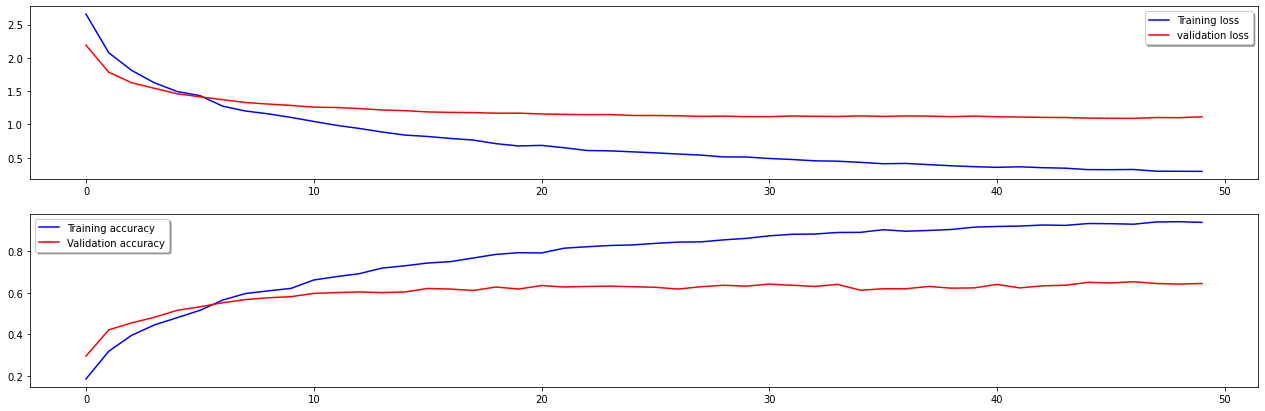

In [ ]:
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Confusion Matrix**

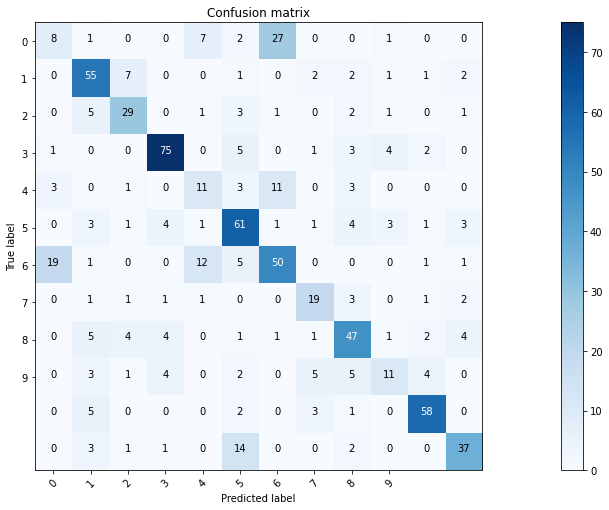

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = ann.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
ann_predict = np.argmax(ann.predict(img_predict))

In [ ]:
print('The predicted flower is with label:', ann_predict)

The predicted flower is with label: 1


In [ ]:
model_performance = model_performance.append({'Model':'ANN',
                                              'Accuracy': ann_accuracy,
                                              'Loss': ann_loss,
                                              'Predicted Class': ann_predict                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,SVM,0.311888,NA,7
1,RF,0.408392,NA,1
2,DT,0.397203,NA,1
3,ANN,0.655944,1.060049,1


### *Classification using Convolution Neural Network (CNN)*

In [ ]:
def cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  batch_size = None

  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu', batch_input_shape = (batch_size,height, width, num_channels)))


  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.4))



  model.add(GlobalMaxPooling2D())
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = "softmax"))

  optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
  model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
  model.summary()
  return model

In [ ]:
cnn = cnn_model(256,256,3,12)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = cnn.fit(X_train, 
                  y_train, 
                  epochs = 50, 
                  validation_data = (X_val,y_val),
                  batch_size = batch_size)

Epoch 1/50
105/105 [==============================] - 29s 218ms/step - loss: 2.7475 - accuracy: 0.1325 - val_loss: 2.4105 - val_accuracy: 0.1243
Epoch 2/50
105/105 [==============================] - 21s 196ms/step - loss: 2.3609 - accuracy: 0.1903 - val_loss: 2.2049 - val_accuracy: 0.2360
Epoch 3/50
105/105 [==============================] - 21s 196ms/step - loss: 2.1341 - accuracy: 0.2575 - val_loss: 2.0867 - val_accuracy: 0.2416
Epoch 4/50
105/105 [==============================] - 21s 196ms/step - loss: 1.9676 - accuracy: 0.3019 - val_loss: 1.9770 - val_accuracy: 0.2947
Epoch 5/50
105/105 [==============================] - 21s 196ms/step - loss: 1.8452 - accuracy: 0.3474 - val_loss: 1.8007 - val_accuracy: 0.3603
Epoch 6/50
105/105 [==============================] - 21s 196ms/step - loss: 1.7147 - accuracy: 0.4089 - val_loss: 1.6153 - val_accuracy: 0.4595
Epoch 7/50
105/105 [==============================] - 21s 196ms/step - loss: 1.5595 - accuracy: 0.4604 - val_loss: 1.5678 - val_ac

In [ ]:
cnn_loss, cnn_accuracy = cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

23/23 [==============================] - 2s 92ms/step - loss: 0.7168 - accuracy: 0.7692
Test loss: 0.7168187499046326
Test accuracy: 0.7692307829856873


In [ ]:
cnn_predict = np.argmax(cnn.predict(img_predict))

In [ ]:
model_performance = model_performance.append({'Model':'CNN',
                                              'Accuracy': cnn_accuracy,
                                              'Loss': cnn_loss,
                                              'Predicted Class': cnn_predict                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,SVM,0.311888,NA,7
1,RF,0.408392,NA,1
2,DT,0.397203,NA,1
3,ANN,0.655944,1.060049,1
4,CNN,0.769231,0.716819,7


**Data Augmentation**

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
# X_train, X_test, y_train, y_test
history = cnn.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
87/87 - 49s - loss: 0.6323 - accuracy: 0.7968 - val_loss: 0.9344 - val_accuracy: 0.6760 - lr: 0.0010 - 49s/epoch - 561ms/step
Epoch 2/30
87/87 - 41s - loss: 0.6302 - accuracy: 0.7926 - val_loss: 0.7927 - val_accuracy: 0.7137 - lr: 0.0010 - 41s/epoch - 471ms/step
Epoch 3/30
87/87 - 41s - loss: 0.6361 - accuracy: 0.8011 - val_loss: 0.6593 - val_accuracy: 0.7751 - lr: 0.0010 - 41s/epoch - 474ms/step
Epoch 4/30
87/87 - 41s - loss: 0.6207 - accuracy: 0.7923 - val_loss: 0.7958 - val_accuracy: 0.7193 - lr: 0.0010 - 41s/epoch - 468ms/step
Epoch 5/30
87/87 - 41s - loss: 0.6354 - accuracy: 0.7932 - val_loss: 0.6418 - val_accuracy: 0.7584 - lr: 0.0010 - 41s/epoch - 469ms/step
Epoch 6/30
87/87 - 42s - loss: 0.6013 - accuracy: 0.8102 - val_loss: 0.6600 - val_accuracy: 0.7807 - lr: 0.0010 - 42s/epoch - 485ms/step
Epoch 7/30
87/87 - 43s - loss: 0.6117 - accuracy: 0.8065 - val_loss: 0.5678 - val_accuracy: 0.8031 - lr: 0.0010 - 43s/epoch - 490ms/step
Epoch 8/30
87/87 - 41s - loss: 0.6248 - a

In [ ]:
cnn_loss_aug, cnn_accuracy_aug = cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss_aug)
print('Test accuracy:', cnn_accuracy_aug)

23/23 [==============================] - 1s 60ms/step - loss: 0.8121 - accuracy: 0.7427
Test loss: 0.8120754957199097
Test accuracy: 0.7426573634147644


**Model Evaluation**

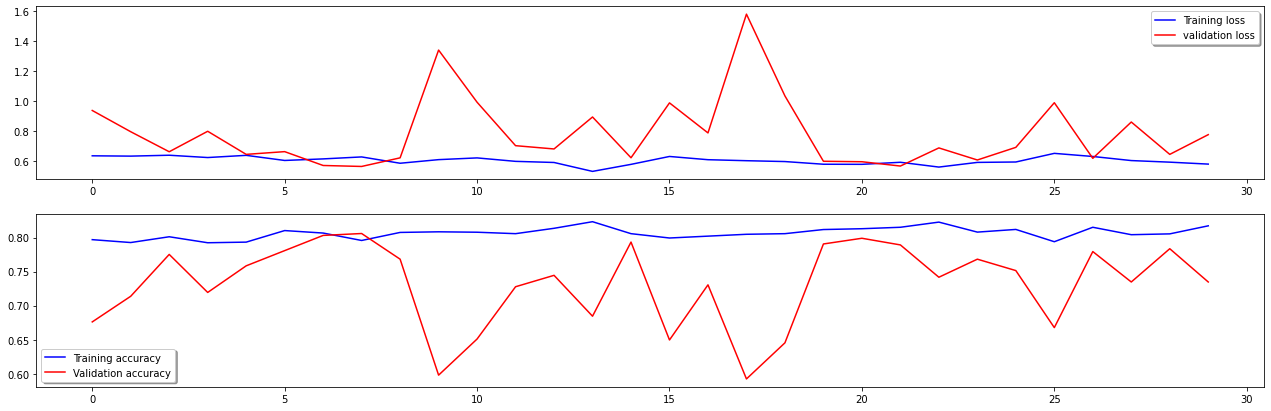

In [ ]:
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Confusion Matrix**

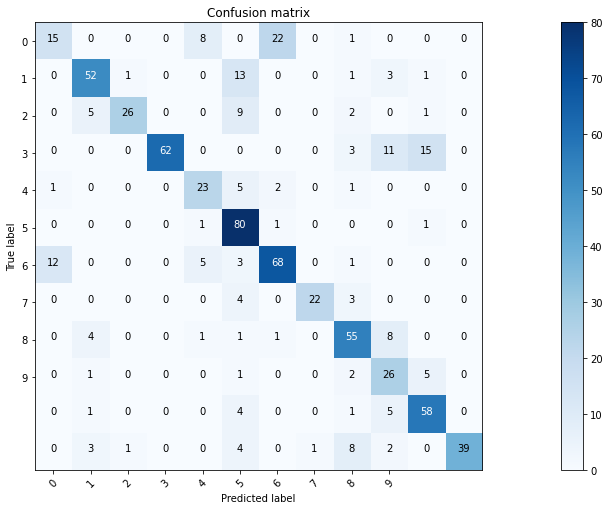

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = cnn.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
cnn_predict_aug = np.argmax(cnn.predict(img_predict))

In [ ]:
print('The predicted flower is with label:', cnn_predict_aug)

In [ ]:
model_performance = model_performance.append({'Model':'CNN with Data Augmentaion',
                                              'Accuracy': cnn_accuracy_aug,
                                              'Loss': cnn_loss_aug,
                                              'Predicted Class': cnn_predict_aug                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,SVM,0.311888,NA,7
1,RF,0.408392,NA,1
2,DT,0.397203,NA,1
3,ANN,0.655944,1.060049,1
4,CNN,0.769231,0.716819,7
5,CNN with Data Augmentaion,0.742657,0.812075,7


**Saving the best model**

In [ ]:
cnn.save("CNN_PlantSeedling_ImageClassification.h5")

## 3. Compare the results from the above step along with your detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case.

### **Conclusion**

Convolution Neural Networks outperforms Neural Networks and which in turn out perform Supervised Learning models. 

The best part of CNNs is high accuracy of image prediction and less loss. Also, we do not have to do feature extraction. The system learns to do feature extraction and the core concept of CNN is, it uses convolution of image and filters to generate invariant features which are passed on to the next layer. The features in the next layer are convoluted with different filters to generate more invariant and abstract features and the process continues till one gets final feature / output which is invariant to occlusions.
ANNs are better than Supervised Learning models because we don't have to perform feature extraction in ANNS whereas in Supervised Learning, we must perform the Principal component analysis (PCA) to compute the principal components in images. 

In predicting the Plant Seedlings dataset, we can see that the accuracy of Support Vector Machines, Random Forest and Decision Tree models are less than 45%. Using ANNs, the accuracy increased to 65%. This was improved much more by using CNNs. The accuracy increased to approximately 76% which was the best model with less loss. CNNs with Data Augmentation was similar to CNN model. It has the accuracy of 74% and with the loss of 81%. 


## 4. Pickle the best performing model.

In [ ]:
import pickle
pickle.dump(history, open("history.pkl", 'wb'))

INFO:tensorflow:Assets written to: ram://79a92e96-8a74-4ef9-adbe-7530e08d9516/assets


## 5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained image classifier model to predict the class.

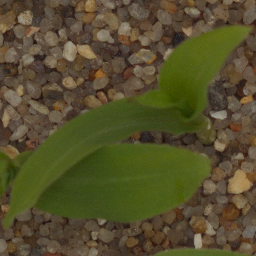

The shape of image to be predicted is:'(578, 578, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 256, 256, 3)'


In [ ]:
from google.colab.patches import cv2_imshow

img_pred = cv2.imread('/content/drive/MyDrive/AIML/Train dataset - CV project 1/Predict.png')
img_pred_resize = cv2.resize(img_pred,(256,256), interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_pred_resize)
img_predict = np.expand_dims(img_pred_resize, axis=0)
print(f"The shape of image to be predicted is:'{img_pred.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{img_predict.shape}'")

In [ ]:
cnn_predict = np.argmax(cnn.predict(img_predict))

In [ ]:
print(cnn_predict)

7


In [ ]:
classes = { 
    0:'Common wheat',
    1:'Maize',
    2:'Fat Hen',
    3:'Shepherds Purse',
    4:'Loose Silky-bent',
    5:'Small-flowered Cranesbill',
    6:'Scentless Mayweed',
    7:'Sugar beet',
    8:'Common Chickweed',
    9:'Cleavers',
    10:'Black-grass',
    11:'Charlock'
    }

In [ ]:
print(f"The predicted Image trained with best classififer CNN is: '{classes[cnn_predict]}'")

The predicted Image trained with best classififer CNN is: 'Sugar beet'
